<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [403]:
df0 = pd.read_csv("adult_eda.csv")
df = df0.copy()

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [366]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [367]:
df.shape

(32561, 15)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [369]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [370]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [371]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [372]:
df[["workclass", "education", "marital-status", "occupation","occupation","race","sex","native-country","salary"]].describe()

,workclass,education,marital-status,occupation,occupation,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,15,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Prof-specialty,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,4140,27816,21790,29170,24720


In [373]:
#look at workclass column here
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [374]:
df["workclass"].value_counts()


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [375]:
df = df[df["workclass"]=="?"]

In [376]:
df[df["workclass"]=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [377]:
df[df["workclass"]=="?"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [378]:
#replace all '?' in whole df with 'Unknown'
df.workclass.replace("?","unknown")

27       unknown
61       unknown
69       unknown
77       unknown
106      unknown
          ...   
32530    unknown
32531    unknown
32539    unknown
32541    unknown
32542    unknown
Name: workclass, Length: 1836, dtype: object

In [379]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [380]:
df.education

27       Some-college
61            7th-8th
69       Some-college
77               10th
106              10th
             ...     
32530       Bachelors
32531       Bachelors
32539       Doctorate
32541         HS-grad
32542         HS-grad
Name: education, Length: 1836, dtype: object

In [381]:
df["education-num"]

27       10.0
61        4.0
69       10.0
77        6.0
106       6.0
         ... 
32530    13.0
32531    13.0
32539     NaN
32541     9.0
32542     9.0
Name: education-num, Length: 1836, dtype: float64

In [382]:
df.groupby(["education", "education-num"])["age"].count()

education     education-num
10th          6.0               99
11th          7.0              117
12th          8.0               39
1st-4th       2.0               12
5th-6th       3.0               30
7th-8th       4.0               69
9th           5.0               51
Assoc-acdm    12.0              46
Assoc-voc     11.0              57
Bachelors     13.0             169
Doctorate     16.0              14
HS-grad       9.0              514
Masters       14.0              48
Preschool     1.0                5
Prof-school   15.0              18
Some-college  10.0             505
Name: age, dtype: int64

In [383]:
a = df.groupby(["education-num"])["age"].count().sort_values(ascending=False)
a

education-num
9.0     514
10.0    505
13.0    169
7.0     117
6.0      99
4.0      69
11.0     57
5.0      51
14.0     48
12.0     46
8.0      39
3.0      30
15.0     18
16.0     14
2.0      12
1.0       5
Name: age, dtype: int64

In [384]:
#drop one of them here
df.drop(columns="education-num", inplace=True)

In [385]:
df.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
marital-status      0
occupation          0
relationship      538
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
salary              0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [386]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.082535,0.072523,0.043599,-0.138976
fnlwgt,-0.082535,1.000000,0.014508,-0.015572,0.022762
capital-gain,0.072523,0.014508,1.000000,-0.020206,0.037798
capital-loss,0.043599,-0.015572,-0.020206,1.000000,0.029185
hours-per-week,-0.138976,0.022762,0.037798,0.029185,1.000000


In [387]:
df["age"].describe()

count    1836.000000
mean       40.960240
std        20.334587
min        17.000000
25%        21.000000
50%        35.000000
75%        61.000000
max        90.000000
Name: age, dtype: float64

In [388]:
#age column
q1 = np.percentile(df['age'], 25)
q3 = np.percentile(df['age'], 75)
IQR_age = q3 - q1 
IQR_age

40.0

In [389]:
upper_lim_age = q3 + (1.5*IQR_age)
upper_lim_age

121.0

In [390]:
df[df["age"] >=78]["age"].value_counts().sort_values(ascending=False)

78    9
79    7
90    7
80    6
81    6
82    5
84    2
83    1
87    1
Name: age, dtype: int64

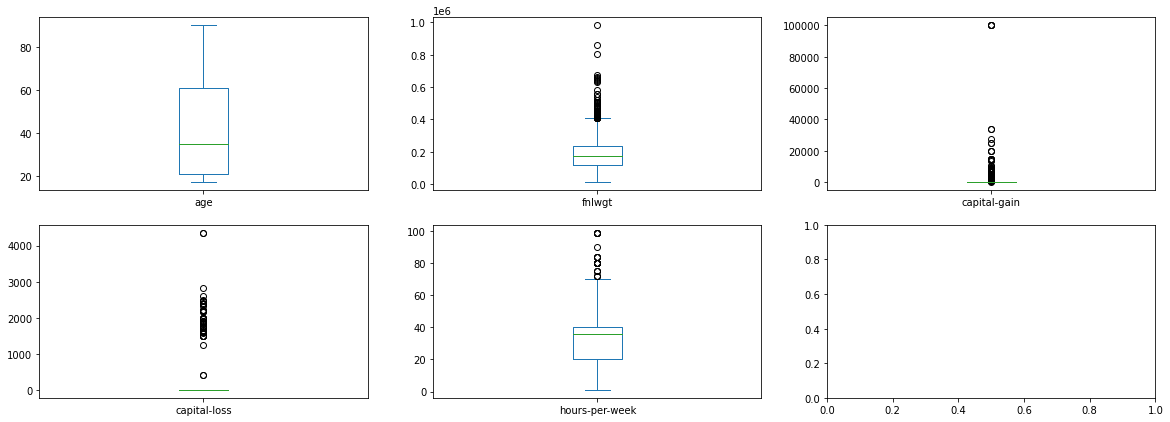

In [391]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [392]:
df[(df["hours-per-week"] == 99)].sample(10)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
#hours per week column
q1_hpw = np.percentile(df["hours-per-week"], 25)
q3_hpw = np.percentile(df["hours-per-week"], 75)
IQR = q3_hpw - q1_hpw
IQR

5.0

In [ ]:
upper_lim_hpw = q3_hpw + (1.5*IQR)
upper_lim_hpw

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [ ]:
c = df[(df["age"]>78) & (df["hours-per-week"]>52.5)]
c

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [ ]:
df.loc[(df["age"]>78) & (df["hours-per-week"]>52.5)].index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [ ]:
drop_index = df.loc[(df["age"]>78) & (df["hours-per-week"]>52.5)].index
df.drop(drop_index)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(32561, 14)

(32561, 14)

In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns
c

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [ ]:
df["relationship"].value_counts()

Husband           13193
Not-in-family      8305
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df["relationship"].isnull().sum()

5068

In [ ]:
df.relationship=df.relationship.replace({np.nan:'Unmarried','Not-in-family':'Unmarried','Other-relative':'Unmarried'})

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
17,32,Private,186824,HS-grad,9.0,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9.0,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9.0,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
35,48,Private,242406,11th,7.0,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,29,Private,125976,HS-grad,9.0,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
32534,37,Private,179137,Some-college,10.0,Divorced,Adm-clerical,Unmarried,White,Female,0,0,39,United-States,<=50K
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32543,45,Local-gov,119199,Assoc-acdm,12.0,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K


In [ ]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [ ]:
race_count = df["race"].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

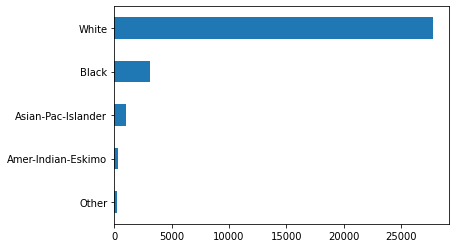

In [ ]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [ ]:
average_age_men = df[df["sex"]=="Male"]["age"].mean()
average_age_men

39.43354749885268

In [ ]:
round(average_age_men,1)

39.4

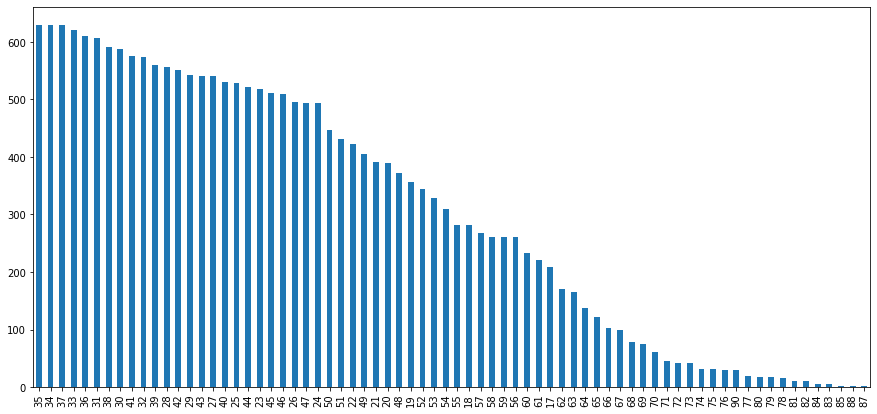

In [ ]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [ ]:
average_age_women = df[df["sex"]=="Female"]["age"].mean()
average_age_women

36.85823043357163

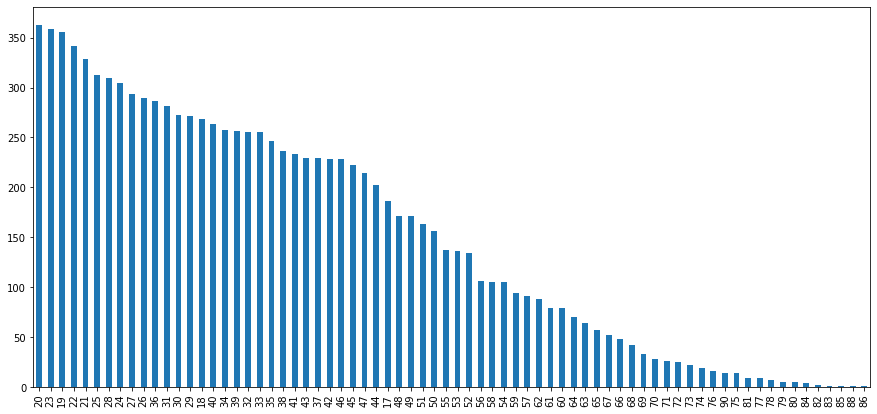

In [ ]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [ ]:
df.education.count()

32561

In [ ]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [395]:
df.groupby("education")["education"].value_counts()

education     education   
10th          10th            100
11th          11th            118
12th          12th             40
1st-4th       1st-4th          12
5th-6th       5th-6th          30
7th-8th       7th-8th          72
9th           9th              51
Assoc-acdm    Assoc-acdm       47
Assoc-voc     Assoc-voc        61
Bachelors     Bachelors       173
Doctorate     Doctorate        15
HS-grad       HS-grad         532
Masters       Masters          48
Preschool     Preschool         5
Prof-school   Prof-school      18
Some-college  Some-college    514
Name: education, dtype: int64

In [ ]:
upper = df.groupby('education').education.count().loc['Bachelors']

lower = df.groupby('education').education.count().sum()

percentage_bachelors = upper / lower * 100

percentage_bachelors


16.444963288378236

In [ ]:
df["education"].value_counts(normalize=True)

HS-grad         0.322540
Some-college    0.223956
Bachelors       0.164450
Masters         0.052840
Assoc-voc       0.042456
11th            0.036097
Assoc-acdm      0.032779
10th            0.028663
7th-8th         0.019815
Prof-school     0.017665
9th             0.015791
12th            0.013302
Doctorate       0.012688
5th-6th         0.010230
1st-4th         0.005161
Preschool       0.001567
Name: education, dtype: float64

In [ ]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [ ]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [396]:
df.salary.value_counts()

<=50K    1645
>50K      191
Name: salary, dtype: int64

In [397]:
df.education.value_counts()

HS-grad         532
Some-college    514
Bachelors       173
11th            118
10th            100
7th-8th          72
Assoc-voc        61
9th              51
Masters          48
Assoc-acdm       47
12th             40
5th-6th          30
Prof-school      18
Doctorate        15
1st-4th          12
Preschool         5
Name: education, dtype: int64

In [400]:
higher_education = (df["education"]=="Bachelors") | (df["education"]=="Masters") | (df["education"]=="Doctorate")
higher_education

27       False
61       False
69       False
77       False
106      False
         ...  
32530     True
32531     True
32539     True
32541    False
32542    False
Name: education, Length: 1836, dtype: bool

In [404]:
df_high_edu = df[(df["education"]=="Bachelors") | (df["education"]=="Masters") | (df["education"]=="Doctorate")]
df_high_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32553,32,Private,116138,Masters,14.0,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K


In [405]:
count = df.education.value_counts().sum()
count

32561

In [412]:
df_high_e = len(df[((df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate")) & ( df["salary"] == ">50K")])     

In [413]:
perc_high_edu = df_high_e / count
perc_high_edu

0.10706059396210191

In [ ]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 10.7


---
# What percentage of people without advanced education make more than 50K?
---

In [415]:
lower_education = df[(~((df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate"))) & ( df["salary"] == ">50K")]

In [416]:
df_low_edu = lower_education
df_low_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,NaN,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [420]:
low_edu = len(df[(~((df["education"] == "Bachelors") | (df["education"] == "Masters") | (df["education"] == "Doctorate"))) & ( df["salary"] == ">50K")])
low_edu

4355

In [422]:
count =len(df.education)

In [423]:
count

32561

In [424]:
perc_low_edu = low_edu / count
perc_low_edu

0.13374896348392248

In [ ]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.38


In [ ]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [ ]:
df["hours-per-week"].value_counts()

40    15217
50     2819
45     1824
60     1471
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [426]:
lazy_riches = df[(df["hours-per-week"] == df["hours-per-week"].min()) & (df["salary"] == ">50K")]
lazy_riches

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [427]:
num_lazy_riches = lazy_riches.value_counts().sum()
num_lazy_riches

2

In [428]:
num_min_workers = len(df[df['hours-per-week']==df['hours-per-week'].min()])
num_min_workers

20

In [ ]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [429]:
country_salary_df = df.groupby("native-country")[["salary"]].count()
country_salary_df

,salary
native-country,
?,583
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106


In [430]:
salary = df[df["salary"] == ">50K"]
country_salary_df_riches =  salary.groupby("native-country")[["salary"]].count()
country_salary_df_riches

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [ ]:
rich_per_country = country_salary_df_riches / country_salary_df
rich_per_country.sort_values(by="salary")

,salary
native-country,
Dominican-Republic,0.028571
Columbia,0.033898
Guatemala,0.046875
Mexico,0.051322
Nicaragua,0.058824
Peru,0.064516
Vietnam,0.074627
Honduras,0.076923
El-Salvador,0.084906


In [ ]:
df["native-country"]
# rich_per_country.sort_values('salary',ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.418605


In [ ]:
#use iloc here
rich_per_country.sort_values('salary',ascending=False).iloc[[0]]

,salary
native-country,
Iran,0.418605


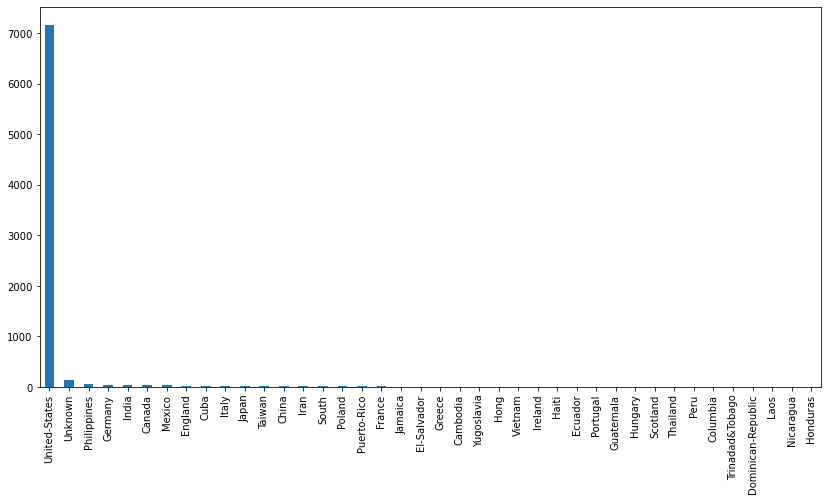

In [ ]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

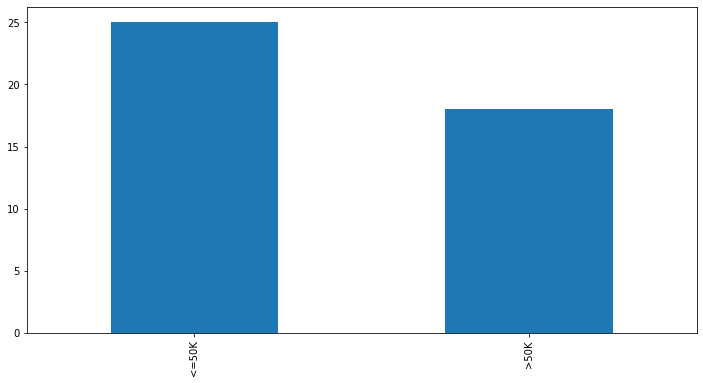

In [ ]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [431]:
top_IN_occupation = (df['native-country'] == 'India') & (df['salary'] == '>50K')

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [432]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,9.0,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K


In [433]:
df[top_IN_occupation].occupation.value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [434]:
[df[top_IN_occupation].occupation.mode()]

[0    Prof-specialty
 dtype: object]

In [436]:
a = [df[top_IN_occupation].occupation.mode()] #use mode here
a

[0    Prof-specialty
 dtype: object]

In [437]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

[0    Prof-specialty
dtype: object] the most popular occupation for those who earn >50K in India.


----
---